# Computer Assignment:  Color and Contrast Manipulations
## Alaqian Zafar - aaz7118
### Problem 1 (Working with Images)
#### (a) Load an RGB color image and display the RGB image as well as the R, G, and B channels separately. Describe what you observe in each component.

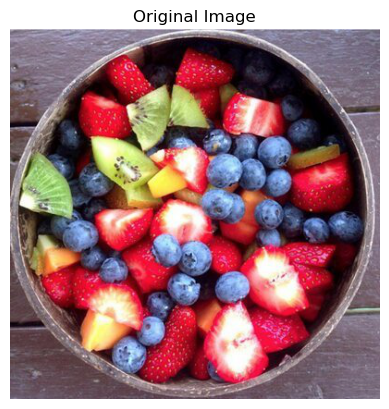

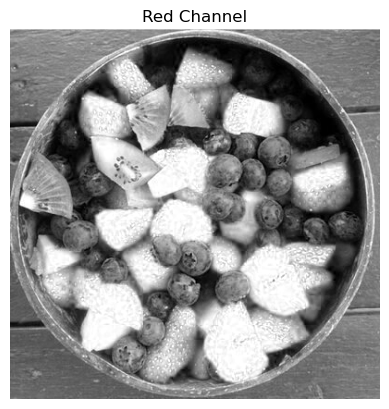

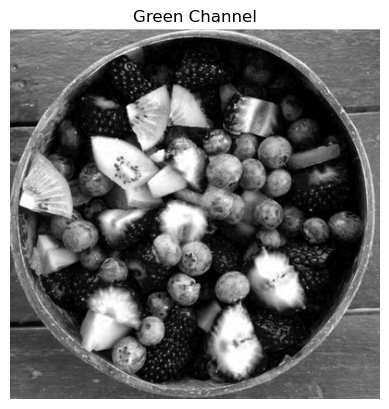

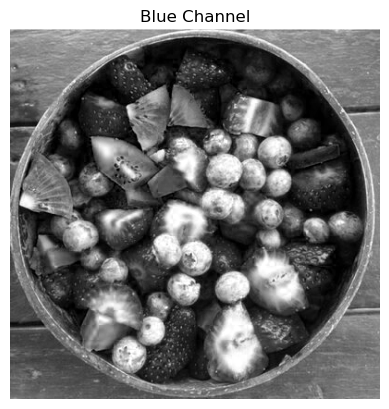

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# load a color image
image = cv2.imread('Berries.jpg')
# convert the color image from BGR to RGB 
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# define function to display images, shows RGB by default
def show_image(image, title, channel='RGB'):
    plt.figure()
    plt.axis('off')
    plt.title(title)
    if channel=='RGB':
        plt.imshow(image)
    elif channel=='gray':
        plt.imshow(image,cmap='gray')  
    else:
        plt.imshow(image[:,:,channel],cmap='gray')    
# display colr image as well as the R, G and B channels separately
show_image(image_rgb, 'Original Image')
show_image(image_rgb, 'Red Channel', 0)
show_image(image_rgb, 'Green Channel', 1)
show_image(image_rgb, 'Blue Channel', 2)

When using the `cv2.imread` function to read an image, the data is stored in a 3-dimensional matrix as a numpy array. This matrix separates the three color channels of the image (red, blue, and green) into individual 2-dimensional matrices, each corresponding to the shape of the original image. 

By isolating these color channels, it is possible to examine the strength of each one. Representing each 2-dimensional matrix as a grayscale image demonstrates the intensity of the specific color. In the red, green, and blue channel images, the more white a pixel is, the greater the presence of that color component in the pixel.
#### (b) Convert the RGB image to the HSV colorspace and display the H, S, and V channels separately. Describe your observations.

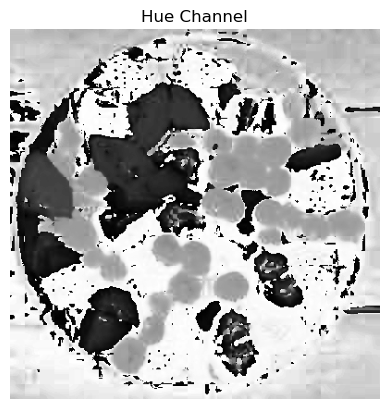

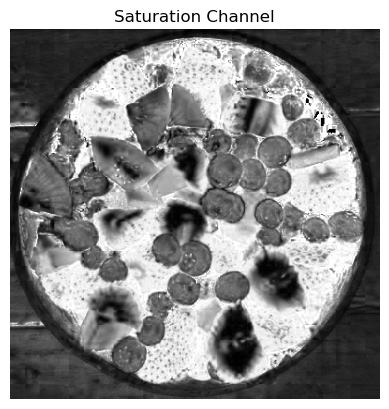

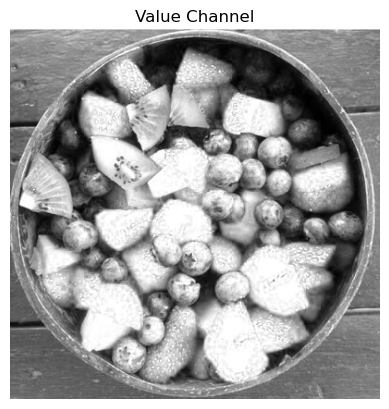

In [2]:
# convert the color image from RGB to BGR
image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)
# display the H, S, and V channels separately as a grayscale image
show_image(image_hsv, 'Hue Channel',0)
show_image(image_hsv, 'Saturation Channel',1)
show_image(image_hsv, 'Value Channel',2)

HSV images store the image's data based on its hue, saturation and value components. HSV color model, hue represents the angle of a color on the color wheel, saturation represents the purity of the color, and value represents the brightness of the color. In the first image, the darker the regions are the lower angles of a color on the color wheel while in the next 2 images, the brighter regions represent higher saturation and value channels. The Value image is mostly while indicating a uniform brightness of color in the image.
#### (c) Detect blue pixels, defined by having a hue in range [110,130]. Your detected pixels should be in the form of a binary mask. Use this mask to display only the blue pixels of your original image, with the non-blue pixels displayed as black.

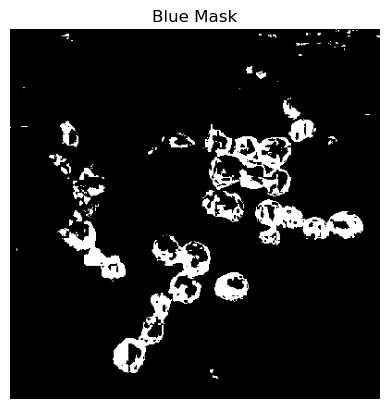

In [3]:
# extract the blue portion of the image. 
# Note: I used the range [50,255] for S and V channels but other ranges might also work
blue_mask = cv2.inRange(image_hsv,(110,50,50),(130,255,255))
image_hsv_blue_extracted = cv2.bitwise_and(image_hsv, image_hsv, mask = blue_mask)
# display the blue part of the image 
show_image(blue_mask,'Blue Mask','gray')

### Problem 2 (Contrast Enhancement)
#### (a) Load and display a low-contrast grayscale image.

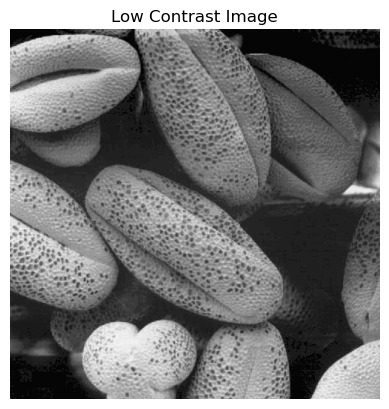

In [4]:
# load low-contrast grayscale image
image_low_cntrst = cv2.imread('seeds.jpg',0)
# display the low-contrast image
show_image(image_low_cntrst, 'Low Contrast Image', 'gray')

#### (b) Calculate and plot the image's histogram. Comment on the relation between the image's contrast and its histogram.

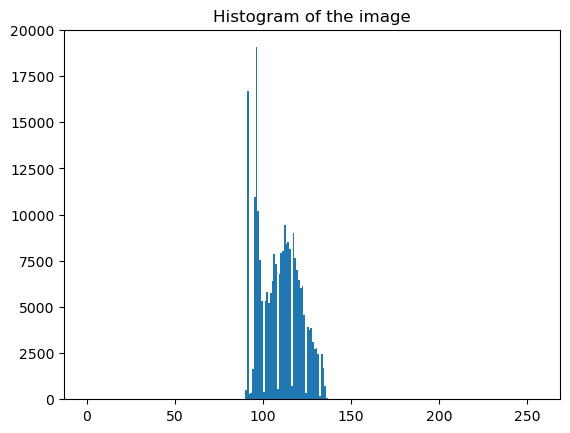

In [5]:
# calculate the histogram and corresponding bins
histogram, bins = np.histogram(image_low_cntrst.flatten(),256,[0,256])
# plot the image histogram
plt.figure()
plt.title('Histogram of the image')
plt.hist(image_low_cntrst.ravel(),256,[0,256]);

The histogram has most of the pixels lying in a low range of values. That means there is not a lot of contrast between the lowest and highest pixels.
#### (c) Recall, we derived in lecture that the cumulative distribution function (CDF) of the histogram is the theoretic optimal histogram-equalization transformation function. Plot the CDF of your histogram. Is this an appropriate equalization function? Why or why not?

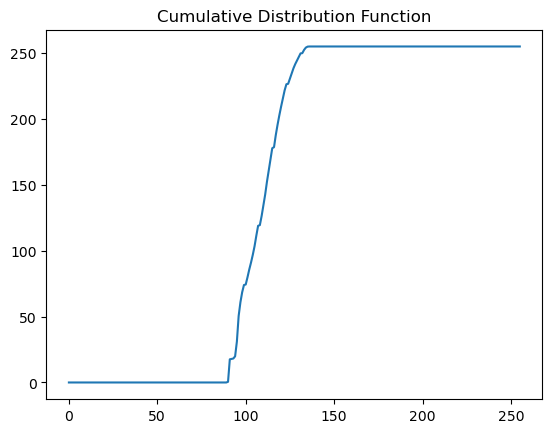

In [6]:
# calculae the cdf
cdf = histogram.cumsum()
# normalize the values to 0-255
cdf_normalized = cdf * 255/ cdf[-1]
# plot the CDF of the histogram
plt.figure()
plt.title('Cumulative Distribution Function')
plt.plot(range(256),cdf_normalized);

This might be a an appropriate function to normalize the image as it would compress the low values and boost the high values on the low and high ends of the histogram.
#### (d) Apply the CDF as a transformation function to your image1. Display your transformed image and its histogram. Has your image's histogram been equalized? Comment on the your original image and histogram vs. the transformed image and histogram.

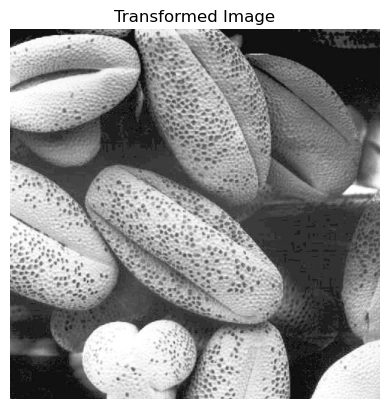

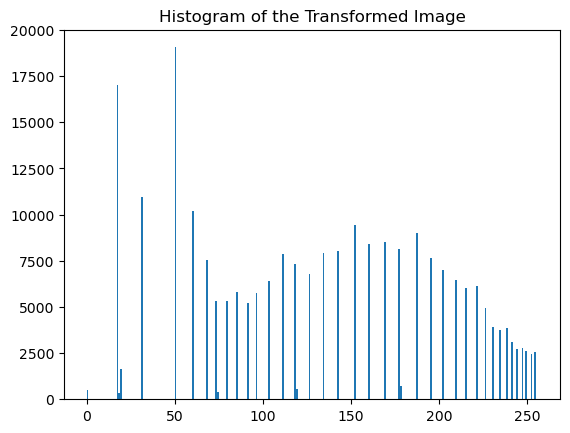

In [7]:
# replace the values with the normalized cdf values
image_low_cntrst_trnsfrmd = cdf_normalized[image_low_cntrst]
# display the image after transformation
show_image(image_low_cntrst_trnsfrmd, 'Transformed Image', 'gray')
# plot the transformed image histogram
histogram, bins = np.histogram(image_low_cntrst_trnsfrmd.flatten(),256,[0,256])
plt.figure()
plt.title('Histogram of the Transformed Image')
plt.hist(image_low_cntrst_trnsfrmd.ravel(),256,[0,256]);

The transformed image has a larger contrast but the whites appear to be excessively blown out. The transformed image has a much wider spectrum of values as compared to the original image. The histogram may not be entirely flat, but it is noticeably more spread out than before the transformation took place.